In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
make_blobs?


In [3]:
x,y = make_blobs(n_samples = 500,n_features = 2,centers = 2,random_state = 10)

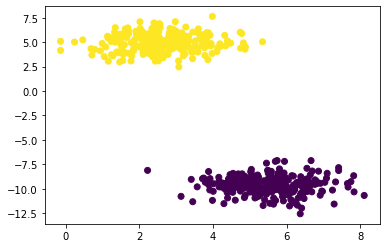

In [4]:
plt.scatter(x[:,0],x[:,1],c = y)

# Now implementing the perceptron

In [6]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [7]:
sigmoid(np.array([1,2,3,4,5]))

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

In [9]:
def predict(x_test,weights):
    pred = np.dot(x_test,weights)
    pred = sigmoid(pred)
    return pred

In [14]:
def logloss(x,y,weights):
    y_ = predict(x,weights)
    loss = np.mean(-y*np.log(y_)-(1-y)*np.log(1-y_))
    return loss

In [11]:
def update(x,y,weights,lr):
    y_ = predict(x,weights)
    dw = np.dot(x.T,y_-y)
    m  = x.shape[0]
    weights  = weights -lr*dw/(float(m))
    return weights

In [12]:
def train(x,y,learn_rate,epochs):
    ones = np.ones((x.shape[0],1))
    x = np.hstack((ones,x))
    
    weights = np.zeros(x.shape[1])
    
    for i in range(epochs):
        weights = update(x,y,weights,learn_rate)
        if i%20==0:
            l = logloss(x,y,weights)
            print("epoch :%d loss : %.4f"%(i,l))
    return weights

In [18]:
weights = train(x,y,0.5,300)

epoch :0 loss : 0.0006
epoch :20 loss : 0.0005
epoch :40 loss : 0.0005
epoch :60 loss : 0.0004
epoch :80 loss : 0.0004
epoch :100 loss : 0.0004
epoch :120 loss : 0.0003
epoch :140 loss : 0.0003
epoch :160 loss : 0.0003
epoch :180 loss : 0.0003
epoch :200 loss : 0.0003
epoch :220 loss : 0.0002
epoch :240 loss : 0.0002
epoch :260 loss : 0.0002
epoch :280 loss : 0.0002


In [19]:
def getPredict(x_test,weights,labels = True):
    if x_test.shape[1]!= weights.shape[0]:
        ones = np.ones((x_test.shape[0],1))
        x_test = np.hstack((ones,x_test))
    prob = predict(x_test,weights)
    if not labels:
        return prob
    else:
        labels = np.zeros(prob.shape)
        labels[prob>0.5] = 1
        return labels

In [20]:
y_pred = getPredict(x,weights)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)


In [28]:
w = train(x_train,y_train,0.5,500)

epoch :0 loss : 0.0006
epoch :20 loss : 0.0005
epoch :40 loss : 0.0004
epoch :60 loss : 0.0004
epoch :80 loss : 0.0004
epoch :100 loss : 0.0003
epoch :120 loss : 0.0003
epoch :140 loss : 0.0003
epoch :160 loss : 0.0003
epoch :180 loss : 0.0003
epoch :200 loss : 0.0003
epoch :220 loss : 0.0002
epoch :240 loss : 0.0002
epoch :260 loss : 0.0002
epoch :280 loss : 0.0002
epoch :300 loss : 0.0002
epoch :320 loss : 0.0002
epoch :340 loss : 0.0002
epoch :360 loss : 0.0002
epoch :380 loss : 0.0002
epoch :400 loss : 0.0002
epoch :420 loss : 0.0002
epoch :440 loss : 0.0002
epoch :460 loss : 0.0001
epoch :480 loss : 0.0001


In [29]:
y_ped  = getPredict(x_test,w)

In [30]:
y_ped==y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [31]:
w

array([ 0.06043974, -0.21193002,  2.06648976])

In [32]:
print(y_test)
print(y_ped)

[1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0
 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1]
[1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.]


In [34]:
copy = getPredict(x_test,w,labels = False)

In [35]:
copy

array([9.99998712e-01, 1.34058464e-09, 9.99776972e-01, 9.99940871e-01,
       9.61288756e-11, 9.99736269e-01, 2.01315846e-10, 9.99965991e-01,
       9.99973271e-01, 3.46850625e-09, 9.99701843e-01, 3.05803862e-11,
       4.82191097e-09, 3.77093742e-11, 6.30698534e-10, 1.53313128e-08,
       4.87081643e-11, 9.99573067e-01, 9.99942392e-01, 9.99999241e-01,
       9.99958743e-01, 9.99881681e-01, 9.99983286e-01, 9.99901631e-01,
       9.35992378e-09, 9.99979752e-01, 9.99997864e-01, 9.99991743e-01,
       9.99998749e-01, 9.99948897e-01, 9.99960188e-01, 7.08691010e-10,
       9.99904890e-01, 2.79306007e-10, 1.75304797e-09, 9.99181396e-01,
       1.87916260e-08, 9.79745903e-10, 9.99873637e-01, 5.70331320e-10,
       9.99995985e-01, 9.98908831e-01, 9.99988950e-01, 9.99853336e-01,
       9.99996968e-01, 9.99975088e-01, 9.99424106e-01, 3.49289630e-09,
       9.99982518e-01, 5.49796720e-10, 9.99815222e-01, 2.35264695e-09,
       6.52798684e-10, 2.08353447e-09, 2.85924669e-10, 9.99787618e-01,
      